In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('Clean Datasets/All-Clean-Game-Logs.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Date,Time,Season,Type,Opponent,Rank,Ranked Match,Conf,Rest Days,SRS,Result,Points For,Points Against,W,L,Home Game,Win Streak,Lose Streak,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,OPP FG,OPP FGA,OPP FG%,OPP 3P,OPP 3PA,OPP 3P%,OPP FT,OPP FTA,OPP FT%,OPP ORB,OPP TRB,OPP AST,OPP STL,OPP BLK,OPP TOV,OPP PF,FG_rolling_5,FGA_rolling_5,FG%_rolling_5,3P_rolling_5,3PA_rolling_5,3P%_rolling_5,FT_rolling_5,FTA_rolling_5,FT%_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP FG_rolling_5,OPP FGA_rolling_5,OPP FG%_rolling_5,OPP 3P_rolling_5,OPP 3PA_rolling_5,OPP 3P%_rolling_5,OPP FT_rolling_5,OPP FTA_rolling_5,OPP FT%_rolling_5,OPP ORB_rolling_5,OPP TRB_rolling_5,OPP AST_rolling_5,OPP STL_rolling_5,OPP BLK_rolling_5,OPP TOV_rolling_5,OPP PF_rolling_5,Rest_Days_Binned
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,W,78,70,1,0,True,0,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,W,83,71,2,0,False,1,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,3-4
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,L,69,90,2,1,False,2,0,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,1-2
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,W,66,53,3,1,True,0,1,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,8+
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,W,85,57,4,1,True,1,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,1-2


In [4]:
# Rename columns with spaces for better usability

df = df.rename(columns={
    "Home Game": "Home_Game",
    "Points For": "Points_For",
    "Points Against": "Points_Against",
    "Rest Days": "Rest_Days",
    "Ranked Match": "Ranked_Match",
    "Win Streak": "Win_Streak",
    "Lose Streak": "Lose_Streak",
    "FG%": "FG_Percent",
    "3P%": "3P_Percent",
    "FT%": "FT_Percent",
    "OPP FG": "OPP_FG",
    "OPP FGA": "OPP_FGA",
    "OPP FG%": "OPP_FG_Percent",
    "OPP 3P": "OPP_3P",
    "OPP 3PA": "OPP_3PA",
    "OPP 3P%": "OPP_3P_Percent",
    "OPP FT": "OPP_FT",
    "OPP FTA": "OPP_FTA",
    "OPP FT%": "OPP_FT_Percent",
    "OPP ORB": "OPP_ORB",
    "OPP TRB": "OPP_TRB",
    'OPP AST': 'OPP_AST',
    'OPP STL': 'OPP_STL',
    'OPP BLK': 'OPP_BLK',
    'OPP TOV': 'OPP_TOV',
    'OPP PF': 'OPP_PF',
    'FG_rolling_5': 'FG_rolling_5',
    'FGA_rolling_5': 'FGA_rolling_5',
    'FG%_rolling_5': 'FG_Percent_rolling_5',
    '3P_rolling_5': '3P_rolling_5',
    '3PA_rolling_5': '3PA_rolling_5',
    '3P%_rolling_5': '3P_Percent_rolling_5',
    'FT_rolling_5': 'FT_rolling_5',
    'FTA_rolling_5': 'FTA_rolling_5',
    'FT%_rolling_5': 'FT_Percent_rolling_5',
    'ORB_rolling_5': 'ORB_rolling_5',
    'TRB_rolling_5': 'TRB_rolling_5',
    'AST_rolling_5': 'AST_rolling_5',
    'STL_rolling_5': 'STL_rolling_5',
    'BLK_rolling_5': 'BLK_rolling_5',
    'TOV_rolling_5': 'TOV_rolling_5',
    'PF_rolling_5': 'PF_rolling_5',
    'OPP FG_rolling_5': 'OPP_FG_rolling_5',
    'OPP FGA_rolling_5': 'OPP_FGA_rolling_5',
    'OPP FG%_rolling_5': 'OPP_FG_Percent_rolling_5',
    'OPP 3P_rolling_5': 'OPP_3P_rolling_5',
    'OPP 3PA_rolling_5': 'OPP_3PA_rolling_5',
    'OPP 3P%_rolling_5': 'OPP_3P_Percent_rolling_5',
    'OPP FT_rolling_5': 'OPP_FT_rolling_5',
    'OPP FTA_rolling_5': 'OPP_FTA_rolling_5',
    'OPP FT%_rolling_5': 'OPP_FT_Percent_rolling_5',
    'OPP ORB_rolling_5': 'OPP_ORB_rolling_5',
    'OPP TRB_rolling_5': 'OPP_TRB_rolling_5',
    'OPP AST_rolling_5': 'OPP_AST_rolling_5',
    'OPP STL_rolling_5': 'OPP_STL_rolling_5',
    'OPP BLK_rolling_5': 'OPP_BLK_rolling_5',
    'OPP TOV_rolling_5': 'OPP_TOV_rolling_5',
    'OPP PF_rolling_5': 'OPP_PF_rolling_5'
})

In [5]:
# Turn our response variable to categorical

df['Result'] = 1 * (df['Result'] == 'W')
df['BIG_10'] = 1 * (df['Conf'] == 'Big Ten')
df

,Date,Time,Season,Type,Opponent,Rank,Ranked_Match,Conf,Rest_Days,SRS,Result,Points_For,Points_Against,W,L,Home_Game,Win_Streak,Lose_Streak,FG,FGA,FG_Percent,3P,3PA,3P_Percent,FT,FTA,FT_Percent,ORB,TRB,AST,STL,BLK,TOV,PF,OPP_FG,OPP_FGA,OPP_FG_Percent,OPP_3P,OPP_3PA,OPP_3P_Percent,OPP_FT,OPP_FTA,OPP_FT_Percent,OPP_ORB,OPP_TRB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV,OPP_PF,FG_rolling_5,FGA_rolling_5,FG_Percent_rolling_5,3P_rolling_5,3PA_rolling_5,3P_Percent_rolling_5,FT_rolling_5,FTA_rolling_5,FT_Percent_rolling_5,ORB_rolling_5,TRB_rolling_5,AST_rolling_5,STL_rolling_5,BLK_rolling_5,TOV_rolling_5,PF_rolling_5,OPP_FG_rolling_5,OPP_FGA_rolling_5,OPP_FG_Percent_rolling_5,OPP_3P_rolling_5,OPP_3PA_rolling_5,OPP_3P_Percent_rolling_5,OPP_FT_rolling_5,OPP_FTA_rolling_5,OPP_FT_Percent_rolling_5,OPP_ORB_rolling_5,OPP_TRB_rolling_5,OPP_AST_rolling_5,OPP_STL_rolling_5,OPP_BLK_rolling_5,OPP_TOV_rolling_5,OPP_PF_rolling_5,Rest_Days_Binned,BIG_10
0,2019-11-05,8:00p,2019-2020,REG,Nicholls State,NaN,False,Southland,0,-3.87,1,78,70,1,0,True,0,0,27,61,0.443,5,19,0.263,19,29,0.655,17,50,12,6,2,22,17,27,66,0.409,8,20,0.400,8,9,0.889,3,18,13,11,4,16,29,27.0,61.000000,0.4430,5.000000,19.0,0.263000,19.00,29.000000,0.65500,17.00,50.000000,12.000000,6.0,2.000000,22.000000,78.000000,27.000000,66.000000,0.409000,8.000000,20.000000,0.400000,8.000000,9.000000,0.889000,3.000000,18.000000,13.0,11.000000,4.000000,16.000000,29.00,0,0
1,2019-11-08,9:00p,2019-2020,REG,Grand Canyon,NaN,False,WAC,3,-6.32,1,83,71,2,0,False,1,0,29,64,0.453,4,13,0.308,21,30,0.700,16,46,13,5,0,17,21,27,61,0.443,8,19,0.421,9,16,0.563,6,23,12,4,0,11,23,28.0,62.500000,0.4480,4.500000,16.0,0.285500,20.00,29.500000,0.67750,16.50,48.000000,12.500000,5.5,1.000000,19.500000,80.500000,27.000000,63.500000,0.426000,8.000000,19.500000,0.410500,8.500000,12.500000,0.726000,4.500000,20.500000,12.5,7.500000,2.000000,13.500000,26.00,3-4,0
2,2019-11-10,9:00p,2019-2020,REG,Arizona,21.0,True,Pac-12,2,19.49,0,69,90,2,1,False,2,0,25,53,0.472,5,16,0.313,14,20,0.700,6,25,10,4,2,22,22,34,61,0.557,7,16,0.438,15,22,0.682,10,32,20,14,3,16,23,27.0,59.333333,0.4560,4.666667,16.0,0.294667,18.00,26.333333,0.68500,13.00,40.333333,11.666667,5.0,1.333333,20.333333,76.666667,29.333333,62.666667,0.469667,7.666667,18.333333,0.419667,10.666667,15.666667,0.711333,6.333333,24.333333,15.0,9.666667,2.333333,14.333333,25.00,1-2,0
3,2019-11-18,8:00p,2019-2020,REG,Hawaii,NaN,False,Big West,8,-1.27,1,66,53,3,1,True,0,1,23,54,0.426,5,12,0.417,15,23,0.652,10,43,14,3,3,15,8,24,64,0.375,3,22,0.136,2,3,0.667,4,25,9,7,2,9,18,26.0,58.000000,0.4485,4.750000,15.0,0.325250,17.25,25.500000,0.67675,12.25,41.000000,12.250000,4.5,1.750000,19.000000,74.000000,28.000000,63.000000,0.446000,6.500000,19.250000,0.348750,8.500000,12.500000,0.700250,5.750000,24.500000,13.5,9.000000,2.250000,13.000000,23.25,8+,0
4,2019-11-20,9:00p,2019-2020,REG,The Citadel,NaN,False,Southern,2,-13.82,1,85,57,4,1,True,1,0,33,68,0.485,3,18,0.167,16,21,0.762,21,53,17,4,4,13,13,21,74,0.284,10,38,0.263,5,7,0.714,15,27,10,8,2,11,19,27.4,60.000000,0.4558,4.400000,15.6,0.293600,17.00,24.600000,0.69380,14.00,43.400000,13.200000,4.4,2.200000,17.800000,76.200000,26.600000,65.200000,0.413600,7.200000,23.000000,0.331600,7.800000,11.400000,0.703000,7.600000,25.000000,12.8,8.800000,2.200000,12.600000,22.40,1-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2024-01-18,8:30p,2023-2024,REG,Michigan,NaN,False,Big Ten,0,5.28,1,88,73,13,4,False,1,0,30,62,0.484,6,18,0.333,22,30,0.733,13,38,12,9,4,6,13,30,63,0.476,3,13,0.231,10,12,0.833,7,25,10,1,0,9,18,25.0,61.400000,0.4084,6.200000,20.2,0.309000,20.00,26.000000,0.77360,10.60,35.400000,10.200000,6.2,4.000000,7.000000,77.400000,29.800000,65.000000,0.459200,3.8

In [6]:
# creat train and test dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=22, stratify=df['Result'])
print(len(df))
print(len(df_train))
print(len(df_test))

166
132
34


In [7]:
# Create a basic model predicting Result from the 5 highest correlated variables
model_1 = smf.logit('Result ~ OPP_FG_Percent + FG_Percent + OPP_FT + SRS + TRB', data=df_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.340705
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  132
Model:                          Logit   Df Residuals:                      126
Method:                           MLE   Df Model:                            5
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                  0.4387
Time:                        15:22:19   Log-Likelihood:                -44.973
converged:                       True   LL-Null:                       -80.119
Covariance Type:            nonrobust   LLR p-value:                 8.909e-14
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4634      3.545      0.131      0.896      -6.485       7.412
OPP_FG_Percent   

In [8]:
# Predict on training data

train_predictions_1 = model_1.predict(df_train[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'SRS', 'TRB']])
train_accuracy_1 = (train_predictions_1.round() == df_train['Result']).mean()

# Predict on test data

test_predictions_1 = model_1.predict(df_test[['OPP_FG_Percent', 'FG_Percent', 'OPP_FT', 'SRS', 'TRB']])
test_accuracy_1 = (test_predictions_1.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_1)
print("Test Accuracy:", test_accuracy_1)

Training Accuracy: 0.8787878787878788
Test Accuracy: 0.9411764705882353


In [9]:
# Now create a model that would be more realistic with what kind of data we would have before a match

model_2 = smf.logit('Result ~ Win_Streak + Lose_Streak + SRS + Rank + Ranked_Match + Home_Game + FG_Percent_rolling_5 + OPP_FG_Percent_rolling_5', data=df_train).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.626613
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                   37
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.09551
Time:                        15:22:23   Log-Likelihood:                -23.185
converged:                       True   LL-Null:                       -25.633
Covariance Type:            nonrobust   LLR p-value:                    0.6726
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.8792   1.82e+14  -2.68e-14      1.000   -3.57e+14

In [10]:
# Predict on training data
train_predictions_2 = model_2.predict(df_train[['Win_Streak', 'Lose_Streak', 'SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
train_accuracy_2 = (train_predictions_2.round() == df_train['Result']).mean()

# Predict on test data
test_predictions_2 = model_2.predict(df_test[['Win_Streak', 'Lose_Streak', 'SRS', 'Rank', 'Ranked_Match', 'Home_Game', 'FG_Percent_rolling_5', 'OPP_FG_Percent_rolling_5']])
test_accuracy_2 = (test_predictions_2.round() == df_test['Result']).mean()

print("Training Accuracy:", train_accuracy_2)
print("Test Accuracy:", test_accuracy_2)

Training Accuracy: 0.1893939393939394
Test Accuracy: 0.20588235294117646


Training Accuracy: 1.0
Test Accuracy: 0.4

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.33      0.20      0.25         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10

Test AUC-ROC Score: 0.5599999999999999


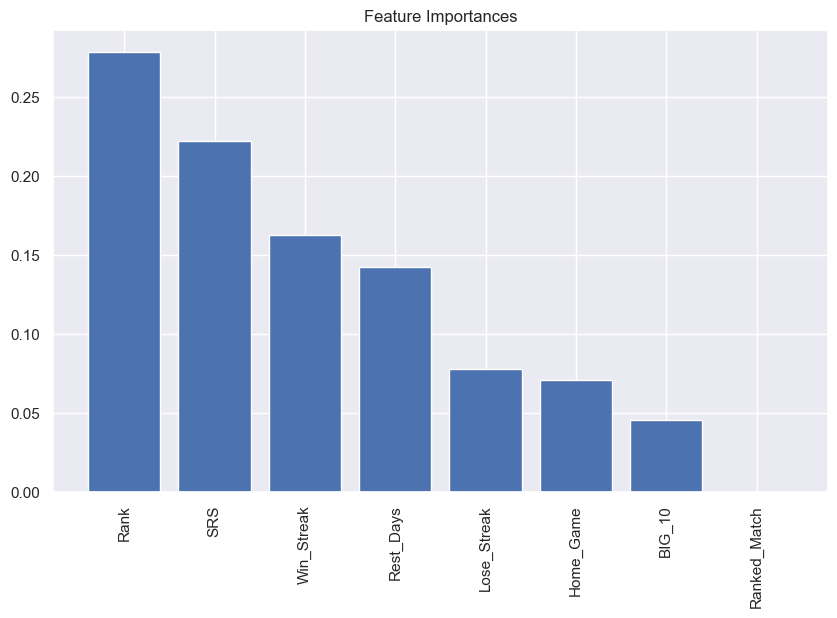

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
df_clean = df.dropna()
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak', 'Lose_Streak']
target = 'Result'

X = df_clean[features]
y = df_clean[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predictions
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

# Feature Importance
plt.figure(figsize=(10, 6))
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


In [19]:
#seeing how well rank does on its own since it was the strongest attribute
feature = 'Rank'
target = 'Result'

X = df_clean[[feature]]  # Notice we use double brackets to keep the DataFrame structure
y = df_clean[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predictions
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 0.8055555555555556
Test Accuracy: 0.5

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.50      0.20      0.29         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10

Test AUC-ROC Score: 0.28


Training Accuracy: 1.0
Test Accuracy: 0.7

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

Test AUC-ROC Score: 0.8


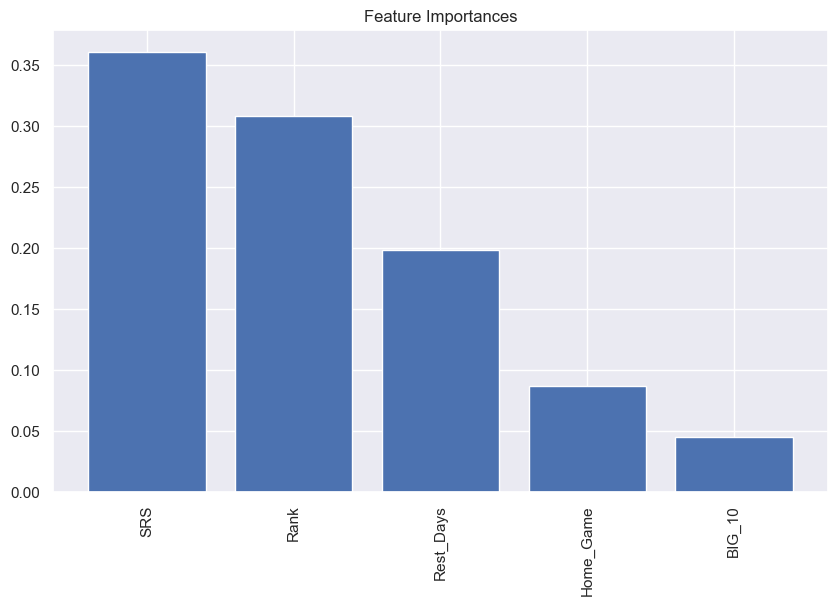

In [42]:
#testing just rnak was not very good as shown above, let's try just removing some features. in this example, we're just removing win and lost streak and ranked_match
features = ['Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game']
target = 'Result'

X = df_clean[features]
y = df_clean[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predictions
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

# Feature Importance
plt.figure(figsize=(10, 6))
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [43]:
#hyperparameter tuning for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Parameter distributions
param_distributions = {
    'n_estimators': np.arange(50, 301, 50),
    'max_features': ['sqrt', 'log2'],  # 'auto' removed because it is not valid
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Output results
print("Best parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Test AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Test Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10

Test AUC-ROC Score: 0.76


In [ ]:
import lightgbm as lgb

params = {'objective' : 'binary', 
          'boosting_type' : 'gbdt',           
          'num_leaves' : 5, 
          'force_row_wise' : True, 
          'metric' : 'rmse', 
          'learning_rate' : 0.5, 
          'feature_fraction' : 0.8, 
          'bagging_fraction' : 0.8,
          'min_data_in_bin' : 1,
          'min_data_in_leaf' : 1,
          'max_bin' : 256
          } 

#https://lightgbm.readthedocs.io/en/latest/Parameters.html <- explanation for parameters
#https://www.geeksforgeeks.org/train-a-model-using-lightgbm/ <- same here

training_data = lgb.Dataset(X_train, label = y_train)
testing_data = lgb.Dataset(X_test, label = y_test, reference = training_data)

gbm = lgb.train(params, training_data,
                 num_boost_round = 41, 
                 valid_sets = testing_data)

#looking into lightgbm modeling, documentation (https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api)

In [ ]:
y_pred_proba = gbm.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) #converts to binary predictions 
y_pred

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
print(classification_report(y_test, y_pred))

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define features and target
features = ['Ranked_Match', 'Rank', 'BIG_10', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak', 'Lose_Streak']
target = 'Result'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)


In [15]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=22, ...)

In [16]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.7647058823529411

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.90      0.75      0.82        24

    accuracy                           0.76        34
   macro avg       0.74      0.78      0.74        34
weighted avg       0.80      0.76      0.77        34

Test AUC-ROC Score: 0.7833333333333333


<Figure size 1000x600 with 0 Axes>

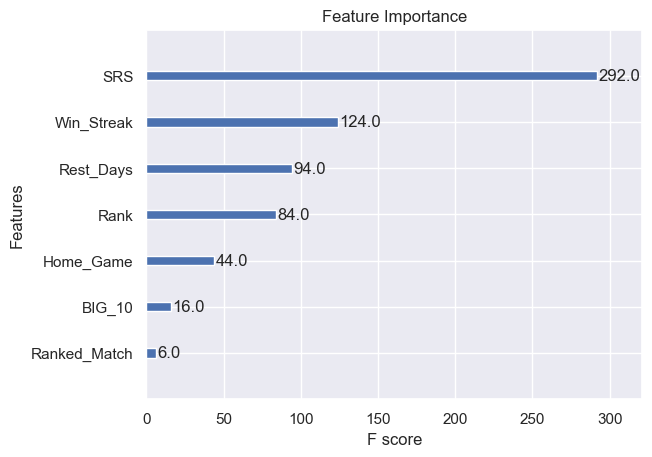

In [17]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

In [18]:
# SRS is our most important by far, let's see how it would do on it's own

# Define feature and target
feature = 'SRS'
target = 'Result'

X = df[feature]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 0.9090909090909091
Test Accuracy: 0.7352941176470589

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.86      0.75      0.80        24

    accuracy                           0.74        34
   macro avg       0.70      0.72      0.70        34
weighted avg       0.76      0.74      0.74        34

Test AUC-ROC Score: 0.79375


In [37]:
# Strong, but still not as good as our first model
# We can try removing Lose_Streak and Ranked_Match from our new model

# Define feature and target
features = ['Rank','Rest_Days', 'SRS', 'Home_Game', 'Win_Streak']
target = 'Result'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

Training Accuracy: 1.0
Test Accuracy: 0.7058823529411765

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.89      0.67      0.76        24

    accuracy                           0.71        34
   macro avg       0.69      0.73      0.69        34
weighted avg       0.77      0.71      0.72        34

Test AUC-ROC Score: 0.775


In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Perform hyperparameter tuning

# Define our parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,
    n_jobs=-1  # Use all available processors
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print best parameters and roc score
print("Best Parameters:", random_search.best_params_)
print("Best AUC-ROC Score:", random_search.best_score_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Make predictions
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate performance
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test AUC-ROC Score:", roc_auc_score(y_test, y_test_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best AUC-ROC Score: 0.7452694235588974
Test Accuracy: 0.7647058823529411
Test AUC-ROC Score: 0.7375

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.90      0.75      0.82        24

    accuracy                           0.76        34
   macro avg       0.74      0.78      0.74        34
weighted avg       0.80      0.76      0.77        34



In [ ]:
# Refine our parameter grid
refined_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.2],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=refined_grid,
    n_iter=50,  # Number of combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=22,
    n_jobs=-1  # Use all available processors
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print best parameters and roc score
print("Best Parameters:", random_search.best_params_)
print("Best AUC-ROC Score:", random_search.best_score_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Make predictions
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test AUC-ROC Score:", roc_auc_score(y_test, y_test_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

In [ ]:
# Now create our best model so far so we can perfrom crossvalidation
# Define the model with the best hyperparameters
xgb_best = XGBClassifier(
    subsample=0.9,
    n_estimators=300,
    min_child_weight=3,
    max_depth=7,
    learning_rate=0.2,
    gamma=0.1,
    colsample_bytree=0.6,
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=22
)

# Train the model
xgb_best.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

# Evaluation Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# AUC-ROC for model evaluation
y_test_pred_prob = xgb_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print("Test AUC-ROC Score:", roc_auc)

In [ ]:
# Observe generalization
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=5, scoring="roc_auc")
print("Fold AUC-ROC Scores:", cv_scores)
print("Mean AUC-ROC:", cv_scores.mean())
print("Standard Deviation of AUC-ROC:", cv_scores.std())

### Apply Models to 2024-2025 Season

In [32]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://www.sports-reference.com/cbb/schools/illinois/men/2025-schedule.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

sched_table = soup.find('table', id='schedule')

sched_elements = sched_table.find_all('th', scope='col')
sched_titles = [th.get_text(strip=True) for th in sched_elements]
df_sched = pd.DataFrame(columns=sched_titles)

sched_body = sched_table.find('tbody')
sched_rows = sched_body.find_all('tr')
for row in sched_rows:
    if 'thead' in row.get('class', []):
        continue

    header = row.find_all('th')
    data = row.find_all('td')

    whole_row = [th.get_text(strip = True) for th in header]
    whole_row.extend([td.get_text(strip = True) for td in data])
    print(whole_row)
        
    df_sched.loc[len(df_sched)] = whole_row

In [ ]:
df_sched

In [35]:
# Rename the columns
df_sched = df_sched.rename(columns={'': 'Site'}, inplace=False)
df_sched.columns.values[4] = 'Site'
df_sched.columns.values[8] = 'Result'

In [ ]:
url2 = 'https://www.sports-reference.com/cbb/schools/illinois/men/2025-gamelogs.html'
page2 = requests.get(url2)
soup2 = BeautifulSoup(page2.text, 'html')

log_table = soup2.find('table', id='sgl-basic_NCAAM')

log_elements = log_table.find_all('th', scope='col')
log_titles = [th.get_text(strip=True) for th in log_elements]
df_log = pd.DataFrame(columns=log_titles)

log_body = log_table.find('tbody')
log_rows = log_body.find_all('tr')
for row in log_rows:
    if 'over_header thead' in row.get('class', []):
        continue
    elif 'thead' in row.get('class', []):
        continue

    header = row.find_all('th')
    data = row.find_all('td')

    whole_row = [th.get_text(strip=True) for th in header]
    whole_row.extend([td.get_text(strip=True) for td in data])
    print(whole_row)

    df_log.loc[len(df_log)] = whole_row

In [ ]:
df_log

In [ ]:
df_sched = df_sched.drop(columns=['G', 'Site', 'Streak', 'OT'])
df_sched['Home_Game'] = df_sched['Arena'] == 'State Farm Center'
df_sched = df_sched.drop(columns='Arena')
df_sched.rename(columns={'Unnamed: 9' : 'Result'}, inplace=True)
df_sched.insert(4, 'Rank', None)
df_sched['Rank'] = df_sched['Opponent'].str.extract(r'\((\d+)\)')
df_sched['Rank'] = df_sched['Rank'].apply(lambda x: int(x) if pd.notna(x) else None)
df_sched['Opponent'] = df_sched['Opponent'].str.replace(r'\s*\(\d+\)', '', regex=True)
df_sched.insert(5, 'Ranked_Match', None)
df_sched['Ranked_Match'] = df_sched['Rank'].notna()
df_sched

In [ ]:
df_log = df_log.drop(columns=['G', ''])
df_log

In [ ]:
df_predict = pd.merge(df_sched, df_log, left_index=True,right_index=True, how='inner')
def add_rest_time(game_log):
    game_log['Date_x'] = pd.to_datetime(game_log['Date_x'])
    game_log = game_log.sort_values(by='Date_x').reset_index(drop=True)
    game_log['Rest_Days'] = game_log['Date_x'].diff().dt.days.fillna(0).astype(int)
    game_log['Rest_Days'] = game_log['Rest_Days'].apply(lambda x: max(x, 0))
    game_log.insert(8, 'Rest_Days', game_log.pop('Rest_Days'))
    
    return game_log

df_predict = add_rest_time(df_predict)
df_predict['Win_Streak'] = 0
df_predict['Lose_Streak'] = 0
df_predict = df_predict[['Opponent', 'Rank', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak']]
df_predict

In [ ]:
# Dynamically update Win_Streak and Results
win_streak = 0
win_streaks = []
results = []

for i, row in df_predict.iterrows():
    current_streak = win_streak
    
    X_current = row[['Rank', 'Rest_Days', 'SRS', 'Home_Game', 'Win_Streak']].values.reshape(1, -1)

    y_pred = xgb_best.predict(X_current)
    
    win_streaks.append(current_streak)

    if y_pred == 1:
        results.append("W")
        win_streak += 1
    else:
        results.append("L")
        win_streak = 0

df_predict['Win_Streak'] = win_streaks
df_predict['Result'] = results

df_predict

In [ ]:
# Print season record
season_counts = df_predict['Result'].value_counts()

season_wins = season_counts.get('W', 0)  
season_losses = season_counts.get('L', 0) 

print(f"Season Record: {season_wins} Wins - {season_losses} Losses")